<a href="https://colab.research.google.com/github/freedom-780/Weather_trends/blob/main/Weather_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outline 

*   Tools used: Python in a Colab Notebook
*   Calculated the moving average using avg_temp.rolling().mean()
*   Used the seaborn library to visualize the trends using a standardline plot. No other considerations were needed in this case
*   Colab file and data files avaliable at: https://github.com/freedom-780/Weather_trends/blob/main/Weather_project.ipynb
*  SQL commands used to extract the data: SELECT city, country, avg_temp, year
  FROM city_data; SELlECT avg_temp, year FROM city_data
*   CO2 yearly average and growth data files are from: Ed Dlugokencky and Pieter Tans, NOAA/GML (www.esrl.noaa.gov/gmd/ccgg/trends/)








# Import Data from SQL Files 

Import library files and import csv files from Github repository 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
city_weather = "https://raw.githubusercontent.com/freedom-780/Weather_trends/b4066594b64afa00050fffdfc4995868d2f36ed1/city_data.csv"
city_weather = pd.read_csv(city_weather)
city_weather.head()

,city,country,avg_temp,year
0,Abidjan,Côte D'Ivoire,25.58,1849
1,Abidjan,Côte D'Ivoire,25.52,1850
2,Abidjan,Côte D'Ivoire,25.67,1851
3,Abidjan,Côte D'Ivoire,NaN,1852
4,Abidjan,Côte D'Ivoire,NaN,1853


In [2]:
 chicago_weather = city_weather[city_weather["city"] == "Chicago"]
chicago_weather.head()

,city,country,avg_temp,year
15107,Chicago,United States,5.44,1743
15108,Chicago,United States,11.73,1744
15109,Chicago,United States,1.80,1745
15110,Chicago,United States,NaN,1746
15111,Chicago,United States,NaN,1747


In [3]:
global_weather = pd.read_csv('https://raw.githubusercontent.com/freedom-780/Weather_trends/b4066594b64afa00050fffdfc4995868d2f36ed1/global_data.csv')
global_weather.head()

,avg_temp,year
0,8.72,1750
1,7.98,1751
2,5.78,1752
3,8.39,1753
4,8.47,1754



# Exploratory Data Analysis

check for null values 

In [4]:
chicago_weather.isnull().sum()

city        0
country     0
avg_temp    4
year        0
dtype: int64

fill the NA with previous values for the Chicago trend file
and double check if there still are null values

In [5]:
chicago_weather_fill = chicago_weather.fillna(method='ffill')
chicago_weather_fill.isnull().sum()

city        0
country     0
avg_temp    0
year        0
dtype: int64

In [6]:
global_weather.isnull().sum()

avg_temp    0
year        0
dtype: int64

Initial Plot of data without moving averages

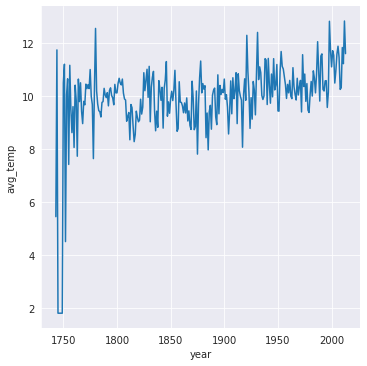

In [7]:
sns.set_style("darkgrid") 
sns.relplot(x="year", y="avg_temp", kind="line", data=chicago_weather_fill)


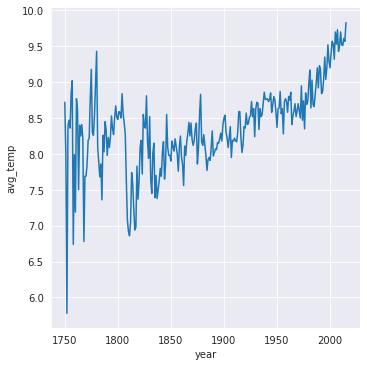

In [8]:

sns.relplot(x="year", y="avg_temp", kind="line", data=global_weather)



# Calculate the Moving Average of Data and plot 

Use avg_temp.rolling().mean() methods to calcuate the average mean
for chicago and global weather trends. According to the National Center for Environmental Information, 30 years is the typical moving average, but 15 is used to find smaller variations for climate change, so 15 years are used.

In [9]:
chicago_weather_fill[ '15year_rolling_avg' ] = chicago_weather_fill.avg_temp.rolling(30).mean()
chicago_weather_fill.head(16)

,city,country,avg_temp,year,15year_rolling_avg
15107,Chicago,United States,5.44,1743,NaN
15108,Chicago,United States,11.73,1744,NaN
15109,Chicago,United States,1.80,1745,NaN
15110,Chicago,United States,1.80,1746,NaN
15111,Chicago,United States,1.80,1747,NaN
15112,Chicago,United States,1.80,1748,NaN
15113,Chicago,United States,1.80,1749,NaN
15114,Chicago,United States,10.49,1750,NaN
15115,Chicago,United States,11.19,1751,NaN
15116,Chicago,United States,4.50,1752,NaN


plot moving average weather trends

Text(0.5, 1.0, 'Chicago Weather Trends')

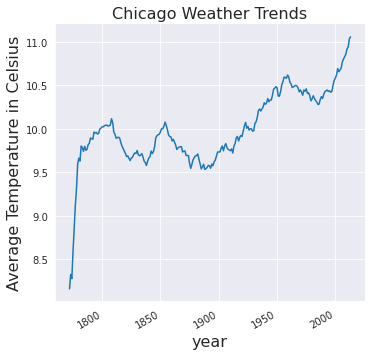

In [10]:
sns.relplot(x="year", y='15year_rolling_avg', kind="line", data=chicago_weather_fill).fig.autofmt_xdate()
plt.xlabel("year", size=16)
plt.ylabel("Average Temperature in Celsius", size=16)
plt.title("Chicago Weather Trends", size=16)



Get some statistics on the data

In [11]:
chicago_weather_fill.describe()

,avg_temp,year,15year_rolling_avg
count,271.000000,271.000000,242.000000
mean,9.906494,1878.000000,9.996711
std,1.491861,78.375166,0.427941
min,1.800000,1743.000000,8.156667
25%,9.450000,1810.500000,9.731583
50%,10.100000,1878.000000,9.929333
75%,10.580000,1945.500000,10.348917
max,12.820000,2013.000000,11.059000


In [18]:
global_weather['15year_rolling_avg_global'] = global_weather.avg_temp.rolling(15).mean() 

Text(0.5, 1.0, 'Global Weather Trends')

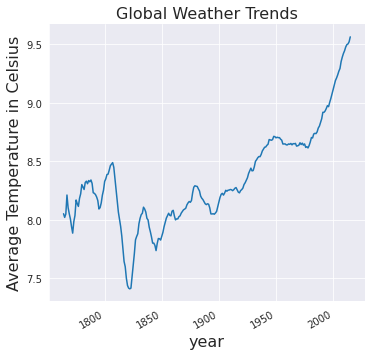

In [19]:
sns.relplot(x="year", y='15year_rolling_avg_global', kind="line", data=global_weather).fig.autofmt_xdate()
plt.xlabel("year", size=16)
plt.ylabel("Average Temperature in Celsius", size=16)
plt.title("Global Weather Trends", size=16)


In [14]:
global_weather.describe()

,avg_temp,year,15year_rolling_avg_global
count,266.000000,266.000000,252.000000
mean,8.369474,1882.500000,8.345159
std,0.584747,76.931788,0.419722
min,5.780000,1750.000000,7.408667
25%,8.082500,1816.250000,8.057500
50%,8.375000,1882.500000,8.256667
75%,8.707500,1948.750000,8.640667
max,9.830000,2015.000000,9.564667


# Observations

Observations:

1.   Both Graphs show the same drop in temperature between 1800 and 1850. 
2.   The Chicago weather trends graph has a steep rise(slope) in temperature around 1850 unlike the global trend graph.
3.   They seem to be similar graphs(they both have an increasing trend overall) except that the one in Chicago is at 10C and the other is at 8 degrees.
4.   Both graphs show around the 2000s or eariler a steep raise in trend that seems to be continuing.




